In [1]:
import pg8000
import pandas as pd
import matplotlib
import numpy
%matplotlib inline
conn = pg8000.connect(host="training.c1erymiua9dx.us-east-1.rds.amazonaws.com", port=5432, database="training", user="dot_student", password="qgis")

In [2]:
cursor = conn.cursor()

In [3]:
conn.rollback()

In [4]:
cursor.execute("SELECT * FROM dot_311")
results = []
for item in cursor.fetchall():
    results.append(item)

In [5]:
cursor.execute("select column_name from information_schema.columns where table_name='dot_311'")
columns_names = []
for item in cursor.fetchall():
    print(item)
    columns_names.append(item)

['gid']
['unique_key']
['agency']
['agency nam']
['complaint']
['descriptor']
['location t']
['incident z']
['incident a']
['street nam']
['cross stre']
['cross st_1']
['intersecti']
['intersec_1']
['address ty']
['city']
['landmark']
['facility t']
['status']
['due date']
['resolution']
['resoluti_1']
['community']
['borough']
['x coordina']
['y coordina']
['park facil']
['park borou']
['school nam']
['school num']
['school reg']
['school cod']
['school pho']
['school add']
['school cit']
['school sta']
['school zip']
['school not']
['school or']
['vehicle ty']
['taxi compa']
['taxi pick']
['bridge hig']
['bridge h_1']
['road ramp']
['bridge h_2']
['garage lot']
['ferry dire']
['ferry term']
['latitude']
['longitude']
['location']
['geom']
['created_date']
['closed_date']


In [6]:
df= pd.DataFrame(results)

In [7]:
df.columns = ['gid', 'unique_key', 'agency', 'agency nam', 'complaint', 'descriptor', 'location t', 'incident z', 'incident a', 'street nam', 'cross stre', 'cross st_1', 'intersecti', 'intersec_1', 'address ty', 'city', 'landmark', 'facility t', 'status', 'due date', 'resolution', 'resoluti_1', 'community', 'borough', 'x coordina', 'y coordina', 'park facil', 'park borou', 'school nam', 'school num', 'school reg', 'school cod', 'school pho', 'school add', 'school cit', 'school sta', 'school zip', 'school not', 'school or', 'vehicle ty', 'taxi compa', 'taxi pick', 'bridge hig', 'bridge h_1', 'road ramp', 'bridge h_2', 'garage lot', 'ferry dire', 'ferry term', 'latitude', 'longitude', 'location', 'geom', 'created_date', 'closed_date']

In [8]:
df.head()

,gid,unique_key,agency,agency nam,complaint,descriptor,location t,incident z,incident a,street nam,...,bridge h_2,garage lot,ferry dire,ferry term,latitude,longitude,location,geom,created_date,closed_date
0,2,32570549,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10301,None,None,...,None,None,None,None,40.613803753157917,-74.113373738864198,"(40.61380375315792, -74.1133737388642)",0101000020E61000006829ED83418752C0D7FC121F914E...,2016-02-01 00:12:00,2016-02-01 01:15:00
1,3,32572958,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10301,None,None,...,None,None,None,None,40.626545297464929,-74.091582334480577,"(40.62654529746493, -74.09158233448058)",0101000020E610000011DF267CDC8552C08809E5A23250...,2016-02-01 00:14:00,2016-02-01 00:54:00
2,4,32573576,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10310,None,None,...,None,None,None,None,40.629249554787492,-74.123220752604595,"(40.62924955478749, -74.1232207526046)",0101000020E610000004A84BD9E28752C0DC6AD93F8B50...,2016-02-01 00:15:00,2016-02-01 01:30:00
3,5,32572389,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,None,None,None,...,None,None,None,None,None,None,None,0101000020E610000004A84BD9E28752C0DC6AD93F8B50...,2016-02-01 00:17:00,2016-02-01 02:35:00
4,6,32570548,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,None,None,None,...,None,None,None,None,None,None,None,0101000020E610000004A84BD9E28752C0DC6AD93F8B50...,2016-02-01 00:19:00,2016-02-01 01:00:00


In [9]:
df.columns

Index(['gid', 'unique_key', 'agency', 'agency nam', 'complaint', 'descriptor',
       'location t', 'incident z', 'incident a', 'street nam', 'cross stre',
       'cross st_1', 'intersecti', 'intersec_1', 'address ty', 'city',
       'landmark', 'facility t', 'status', 'due date', 'resolution',
       'resoluti_1', 'community', 'borough', 'x coordina', 'y coordina',
       'park facil', 'park borou', 'school nam', 'school num', 'school reg',
       'school cod', 'school pho', 'school add', 'school cit', 'school sta',
       'school zip', 'school not', 'school or', 'vehicle ty', 'taxi compa',
       'taxi pick', 'bridge hig', 'bridge h_1', 'road ramp', 'bridge h_2',
       'garage lot', 'ferry dire', 'ferry term', 'latitude', 'longitude',
       'location', 'geom', 'created_date', 'closed_date'],
      dtype='object')

In [10]:
df['new_created_date'] = pd.to_datetime(df['created_date'], 
                                format='%m/%d/%y %H:%M:%S')

In [11]:
df['new_closed_date'] = pd.to_datetime(df['closed_date'], 
                                format='%m/%d/%y %H:%M:%S')

In [12]:
df['time_open'] = df['new_closed_date'] - df['new_created_date']

In [13]:
df.head()

,gid,unique_key,agency,agency nam,complaint,descriptor,location t,incident z,incident a,street nam,...,ferry term,latitude,longitude,location,geom,created_date,closed_date,new_created_date,new_closed_date,time_open
0,2,32570549,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10301,None,None,...,None,40.613803753157917,-74.113373738864198,"(40.61380375315792, -74.1133737388642)",0101000020E61000006829ED83418752C0D7FC121F914E...,2016-02-01 00:12:00,2016-02-01 01:15:00,2016-02-01 00:12:00,2016-02-01 01:15:00,01:03:00
1,3,32572958,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10301,None,None,...,None,40.626545297464929,-74.091582334480577,"(40.62654529746493, -74.09158233448058)",0101000020E610000011DF267CDC8552C08809E5A23250...,2016-02-01 00:14:00,2016-02-01 00:54:00,2016-02-01 00:14:00,2016-02-01 00:54:00,00:40:00
2,4,32573576,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,10310,None,None,...,None,40.629249554787492,-74.123220752604595,"(40.62924955478749, -74.1232207526046)",0101000020E610000004A84BD9E28752C0DC6AD93F8B50...,2016-02-01 00:15:00,2016-02-01 01:30:00,2016-02-01 00:15:00,2016-02-01 01:30:00,01:15:00
3,5,32572389,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,None,None,None,...,None,None,None,None,0101000020E610000004A84BD9E28752C0DC6AD93F8B50...,2016-02-01 00:17:00,2016-02-01 02:35:00,2016-02-01 00:17:00,2016-02-01 02:35:00,02:18:00
4,6,32570548,DOT,Department of Transportation,Traffic Signal Condition,Controller,None,None,None,None,...,None,None,None,None,0101000020E610000004A84BD9E28752C0DC6AD93F8B50...,2016-02-01 00:19:00,2016-02-01 01:00:00,2016-02-01 00:19:00,2016-02-01 01:00:00,00:41:00


In [14]:
df['time_open'].value_counts()

0 days 00:00:00      521
-3 days +00:00:00    184
-6 days +00:00:00    112
-2 days +00:00:00     27
-2 days +23:59:00     26
0 days 00:20:00       23
0 days 01:32:00       10
0 days 01:26:00       10
0 days 00:25:00        9
0 days 01:27:00        9
0 days 02:02:00        9
0 days 01:34:00        9
0 days 00:40:00        9
0 days 00:15:00        8
0 days 01:09:00        8
0 days 00:54:00        8
0 days 01:15:00        8
0 days 00:45:00        8
0 days 01:42:00        8
0 days 00:49:00        7
0 days 01:51:00        7
0 days 01:22:00        7
0 days 01:18:00        7
0 days 01:52:00        7
0 days 02:18:00        7
0 days 01:29:00        7
0 days 01:33:00        7
0 days 01:58:00        7
0 days 01:36:00        7
-4 days +23:59:00      7
                    ... 
0 days 23:53:09        1
0 days 23:53:25        1
29 days 13:19:50       1
0 days 06:54:59        1
0 days 21:32:37        1
10 days 16:07:27       1
0 days 03:14:00        1
0 days 04:56:26        1
3 days 16:46:05        1


In [15]:
time_open = pd.DataFrame(df['time_open'][df['time_open'] > pd.Timedelta(minutes=0)].dropna())

In [16]:
time_open

,time_open
0,0 days 01:03:00
1,0 days 00:40:00
2,0 days 01:15:00
3,0 days 02:18:00
4,0 days 00:41:00
5,0 days 01:39:00
6,0 days 01:08:00
7,0 days 00:38:00
8,0 days 00:10:00
9,0 days 21:57:44


In [17]:
time_open.median()

time_open   1 days 03:33:17
dtype: timedelta64[ns]

In [18]:
time_open.mean()

time_open   8 days 16:15:03.514405
dtype: timedelta64[ns]

In [19]:
time_open.mode()

,time_open
0,00:20:00


In [20]:
time_open['time_open'].quantile(q=0.25)

Timedelta('0 days 12:41:58')

In [21]:
time_open['time_open'].quantile(q=0.5)

Timedelta('1 days 03:33:17')

In [22]:
time_open['time_open'].quantile(q=0.75)

Timedelta('6 days 00:30:23.500000')

In [23]:
iqr = (time_open['time_open'].quantile(q=0.75)) - (time_open['time_open'].quantile(q=0.25))

In [24]:
iqr

Timedelta('5 days 11:48:25.500000')

In [25]:
ual = (iqr * 1.5) + time_open.median()

In [26]:
ual

time_open   9 days 09:15:55.250000
dtype: timedelta64[ns]

In [27]:
lal = (iqr * 1.5) - time_open.median()

In [28]:
lal

time_open   7 days 02:09:21.250000
dtype: timedelta64[ns]

In [29]:
numpy.std(time_open)

time_open   15 days 10:45:41.824078
dtype: timedelta64[ns]

In [30]:
time_open.max()

time_open   89 days 18:54:00
dtype: timedelta64[ns]

In [31]:
time_open.min()

time_open   00:00:01
dtype: timedelta64[ns]

In [32]:
data_range = time_open.max() - time_open.min()

In [33]:
data_range

time_open   89 days 18:53:59
dtype: timedelta64[ns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10df9a0f0>]], dtype=object)

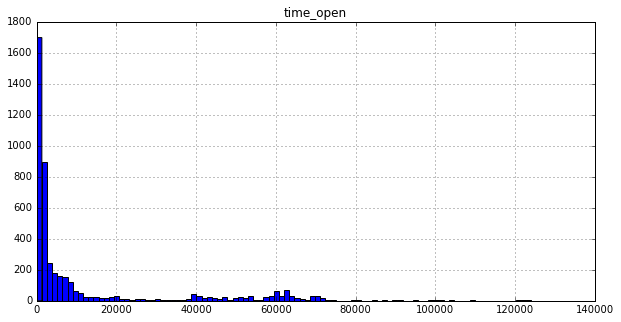

In [67]:
(time_open.astype('timedelta64[m]')).hist(bins=100, figsize=(10,5))

This data are skewed by some outliers, especially in the Q4: while 75% of the complaints have been open 6 days or less, the longest complaint has been open for 89 days - which is also the range of this data -, and the shortest is only one second long. This is also shown by the standard deviation, that is 15 days, and the difference between the mean (1 day) and the mean (8 days and a half). In fact, the most common value is 20 minutes.